# MNIST Auto-Encoder

This program runs in about 67.565 seconds (Windows 11, Intel i7, 16 GB)

## Pre-requisites

Install the following Python packages

1. cloudmesh-installer
2. cloudmesh-common

In [1]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    !pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

## Exporting Output Graphs

In [2]:
def save(graph, filename):
    if os.path.exists("images"):
        pass
    else:
        Shell.mkdir("images")
    plot_model(graph, to_file=f'images/{filename}.png', show_shapes=True)
    plot_model(graph, to_file=f'images/{filename}.pdf', show_shapes=True)

## Import Libraries

In [3]:
StopWatch.start("total")
StopWatch.start("import")
StopWatch.progress(0)

import os    # noqa: E402
import cpuinfo    # noqa: E402
import numpy as np    # noqa: E402
import matplotlib.pyplot as plt    # noqa: E402
from keras.layers import Dense, Input    # noqa: E402
from keras.layers import Conv2D, Flatten    # noqa: E402
from keras.layers import Reshape, Conv2DTranspose    # noqa: E402
from keras.models import Model    # noqa: E402
from keras.datasets import mnist    # noqa: E402
from keras.utils import plot_model    # noqa: E402
from keras import backend as K    # noqa: E402
from cloudmesh.common.systeminfo import os_is_windows    # noqa: E402
from cloudmesh.common.Shell import Shell    # noqa: E402
from cloudmesh.common.util import writefile    # noqa: E402

filename = os.path.basename(__file__)
filename = os.path.splitext(filename)[0]
writefile(filename, 'progress=0')

StopWatch.stop("import")
StopWatch.progress(10)
writefile(filename, 'progress=10')

# cloudmesh status=running progress=0 pid=18028
# cloudmesh status=running progress=1 pid=18028


'# cloudmesh status=running progress=1 pid=18028'

## Data Load

In [4]:
StopWatch.start("data-load")

(x_train, y_train), (x_test, y_test) = mnist.load_data()

StopWatch.stop("data-load")
StopWatch.progress(11)
writefile(filename, 'progress=11')

# cloudmesh status=running progress=20 pid=18028


'# cloudmesh status=running progress=20 pid=18028'

## Data Pre-Process

In [5]:
StopWatch.start("data-pre-process")

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size, image_size, 1)

StopWatch.stop("data-pre-process")
StopWatch.progress(12)
writefile(filename, 'progress=12')

# cloudmesh status=running progress=30 pid=18028


'# cloudmesh status=running progress=30 pid=18028'

## Define Model

In [6]:
StopWatch.start("compile")

batch_size = 32
kernel_size = 3
latent_dim = 16
hidden_units = [32, 64]

inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
x = Dense(hidden_units[0], activation='relu')(x)
x = Dense(hidden_units[1], activation='relu')(x)

shape = K.int_shape(x)

# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs,
                latent,
                name='encoder')
encoder.summary()
save(encoder, 'encoder')

latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Dense(hidden_units[0], activation='relu')(x)
x = Dense(hidden_units[1], activation='relu')(x)

outputs = Dense(1, activation='relu')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
save(decoder, 'decoder')

autoencoder = Model(inputs,
                    decoder(encoder(inputs)),
                    name='autoencoder')
autoencoder.summary()
save(autoencoder, 'autoencoder')

autoencoder.compile(loss='mse', optimizer='adam')

StopWatch.stop('compile')
StopWatch.progress(15)
writefile(filename, 'progress=15')

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 dense (Dense)               (None, 28, 28, 32)        64        
                                                                 
 dense_1 (Dense)             (None, 28, 28, 64)        2112      
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 latent_vector (Dense)       (None, 16)                802832    
                                                                 
Total params: 805,008
Trainable params: 805,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
____________________________________

'# cloudmesh status=running progress=40 pid=18028'

## Train

In [7]:
StopWatch.start("train")

autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=1,
                batch_size=batch_size)

StopWatch.stop("train")
StopWatch.progress(95)
writefile(filename, 'progress=95')

1875/1875 [==============================] - 55s 29ms/step - loss: 0.0172 - val_loss: 0.0128
# cloudmesh status=running progress=60 pid=18028


'# cloudmesh status=running progress=60 pid=18028'

## Test

In [8]:
StopWatch.start("test")

x_decoded = autoencoder.predict(x_test)

StopWatch.stop("test")
StopWatch.progress(99)
writefile(filename, 'progress=99')

313/313 [==============================] - 4s 12ms/step
# cloudmesh status=running progress=80 pid=18028


'# cloudmesh status=running progress=80 pid=18028'

## Visualize

# cloudmesh status=running progress=100 pid=18028

+------------------+----------------------------------------------------------------------------------+
| Attribute        | Value                                                                            |
|------------------+----------------------------------------------------------------------------------|
| cpu              |                                                                                  |
| cpu_cores        | 4                                                                                |
| cpu_count        | 8                                                                                |
| cpu_threads      | 8                                                                                |
| date             | 2022-07-25 13:07:32.589291                                                       |
| frequency        | scpufreq(current=2803.0, min=0.0, max=2803.0)                                    |
| mem.availab

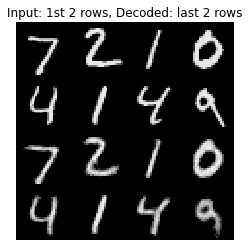

In [9]:
StopWatch.start("visualize")

imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig(f'images/input_and_decoded.png',dpi=300)
plt.savefig(f'images/input_and_decoded.pdf')
plt.savefig(f'images/input_and_decoded.svg')

StopWatch.stop("visualize")
StopWatch.stop("total")
StopWatch.progress(100)
writefile(filename, 'progress=100')

if os_is_windows():
    user = os.environ["USERNAME"]
else:
    try:
        user = os.environ['USER']
    except:  # noqa: E722
        user = os.system('basename $HOME')

try:
    gpuname = ''
    for line in open('mnist_autoencoder.log', 'r'):
        if 'GPU' in line and line[-2] == ')':
            gpuname = gpuname + line[:line.find('(')] + '\n'
except:  # noqa: E722
    gpuname = cpuinfo.get_cpu_info()['brand_raw']

tag = 'mnist_autoencoder'

StopWatch.benchmark(tag=tag, node=gpuname, user=user)